In [1]:
!pip install seaborn

In [2]:
!pip install flask


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.colors as pc

In [4]:
# Read the Vestiaire dataset into a dataframe
vestiaire_df = pd.read_csv('datasets/vestiaire_smaller.csv')

# Display the Head of the Data Frame
print(f"This data frame contains {len(vestiaire_df)} rows.")
vestiaire_df.head(3)



This data frame contains 13736 rows.


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,25775970,Germany,3,14
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,NaN,2709130,Italy,172,6
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,NaN,6048767,Germany,5,15


In [5]:
# Display the Tail of the Data Frame
vestiaire_df.tail(3)


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,NaN,3180346,Italy,11,1
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,NaN,19750106,Italy,62,184
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,NaN,5992355,Estonia,1,1


In [6]:
# Examine the rows and columns count
vestiaire_df.shape

(13736, 20)

# Data Cleaning

In [7]:
vestiaire_clean = vestiaire_df.copy()

In [8]:
vestiaire_clean.columns

Index(['product_id', 'product_type', 'product_name', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_id', 'seller_country', 'seller_products_sold',
       'seller_num_products_listed'],
      dtype='object')

In [9]:
vestiaire_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  13736 non-null  int64  
 1   product_type                13736 non-null  object 
 2   product_name                13736 non-null  object 
 3   product_gender_target       13736 non-null  object 
 4   product_category            13727 non-null  object 
 5   product_season              13736 non-null  object 
 6   product_condition           13736 non-null  object 
 7   product_like_count          13736 non-null  int64  
 8   sold                        13736 non-null  bool   
 9   brand_name                  13736 non-null  object 
 10  product_material            13736 non-null  object 
 11  product_color               13736 non-null  object 
 12  price_usd                   13736 non-null  float64
 13  seller_price                137

In [10]:
vestiaire_clean.drop(columns=['buyers_fees'], inplace=True)

In [11]:
(vestiaire_clean.isna().mean() * 100).sum()

0.06552125800815375

In [12]:
vestiaire_clean.isna().mean() * 100

product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
product_gender_target         0.000000
product_category              0.065521
product_season                0.000000
product_condition             0.000000
product_like_count            0.000000
sold                          0.000000
brand_name                    0.000000
product_material              0.000000
product_color                 0.000000
price_usd                     0.000000
seller_price                  0.000000
seller_earning                0.000000
seller_id                     0.000000
seller_country                0.000000
seller_products_sold          0.000000
seller_num_products_listed    0.000000
dtype: float64

In [13]:
vestiaire_clean = vestiaire_clean.dropna(subset=['product_category'])

In [14]:
vestiaire_clean.isna().mean() * 100

product_id                    0.0
product_type                  0.0
product_name                  0.0
product_gender_target         0.0
product_category              0.0
product_season                0.0
product_condition             0.0
product_like_count            0.0
sold                          0.0
brand_name                    0.0
product_material              0.0
product_color                 0.0
price_usd                     0.0
seller_price                  0.0
seller_earning                0.0
seller_id                     0.0
seller_country                0.0
seller_products_sold          0.0
seller_num_products_listed    0.0
dtype: float64

# Exploratory Data Analysis

In [15]:
# Create pie chart based on the the product_gender_target column.
gender_count = vestiaire_clean['product_gender_target'].value_counts()

fig_gender = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_gender.update_layout(title_text='Gender Distribution of Buyers', title_font_size=24)
fig_gender.show()

In [16]:
# Get the HTML string for the Plotly graph
plotly_gender_html = fig_gender.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_gender_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_gender_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_gender_graph.html


# Seller Map

In [17]:
# Aggregate the data to get the count of sellers per country
seller_counts = vestiaire_clean['seller_country'].value_counts().reset_index()
seller_counts.columns = ['country', 'seller_count']

# Create a list of Countries with Sellers
country_list = seller_counts['country'].tolist()
print(country_list)
print(len(country_list))


['Italy', 'France', 'United Kingdom', 'Germany', 'United States', 'Spain', 'Poland', 'Romania', 'Sweden', 'Greece', 'Bulgaria', 'Netherlands', 'Belgium', 'Austria', 'Portugal', 'Australia', 'Hong Kong', 'Ireland', 'Denmark', 'Lithuania', 'Switzerland', 'Finland', 'Latvia', 'Croatia', 'Czech Republic', 'Hungary', 'Monaco', 'Cyprus', 'Slovakia', 'Canada', 'Luxembourg', 'Singapore', 'Estonia', 'Slovenia', 'Japan', 'United Arab Emirates', 'Malaysia', 'South Korea', 'Philippines', 'Malta', 'Turkey', 'China', 'Qatar', 'Kazakhstan', 'Lebanon', 'Israel', 'Indonesia', 'Bahrain', 'Norway', 'Saudi Arabia', 'New Zealand']
51


In [18]:
# Read the CSV file containing country coordinates
country_coords_file = pd.read_csv('datasets\country_coords.csv')

# Filter the DataFrame to only include countries in country_list
filtered_coords_df = country_coords_file[country_coords_file['country'].isin(country_list)]

# Create the dictionary
country_coords = {
    row['country']: {'lat': row['lat'], 'lon': row['lon']}
    for _, row in filtered_coords_df.iterrows()
}

# Display the resulting dictionary
print(country_coords)

# Check if the lengths match
if len(country_coords) == len(country_list):
    print("The lengths match!")
else:
    print(f"The lengths do not match. Dictionary length: {len(country_coords)}, List length: {len(country_list)}")

{'United Arab Emirates': {'lat': 23.424076, 'lon': 53.847818}, 'Austria': {'lat': 47.516231, 'lon': 14.550072}, 'Australia': {'lat': -25.274398, 'lon': 133.775136}, 'Belgium': {'lat': 50.503887, 'lon': 4.469936}, 'Bulgaria': {'lat': 42.733883, 'lon': 25.48583}, 'Bahrain': {'lat': 25.930414, 'lon': 50.637772}, 'Canada': {'lat': 56.130366, 'lon': -106.346771}, 'Switzerland': {'lat': 46.818188, 'lon': 8.227512}, 'China': {'lat': 35.86166, 'lon': 104.195397}, 'Cyprus': {'lat': 35.126413, 'lon': 33.429859}, 'Czech Republic': {'lat': 49.817492, 'lon': 15.472962}, 'Germany': {'lat': 51.165691, 'lon': 10.451526}, 'Denmark': {'lat': 56.26392, 'lon': 9.501785}, 'Estonia': {'lat': 58.595272, 'lon': 25.013607}, 'Spain': {'lat': 40.463667, 'lon': -3.74922}, 'Finland': {'lat': 61.92411, 'lon': 25.748151}, 'France': {'lat': 46.227638, 'lon': 2.213749}, 'United Kingdom': {'lat': 55.378051, 'lon': -3.435973}, 'Greece': {'lat': 39.074208, 'lon': 21.824312}, 'Hong Kong': {'lat': 22.396428, 'lon': 114.109

In [19]:
# Create the Coordinate DataFrame
coords_df = pd.DataFrame.from_dict(country_coords, orient='index').reset_index()
coords_df.columns = ['country', 'lat', 'lon']

# Merge the data
seller_location_data = pd.merge(seller_counts, coords_df, on='country')

In [20]:
# Create Bubble Map
fig_seller_loc = px.scatter_geo(
    seller_location_data,
    lat='lat',
    lon='lon',
    size='seller_count',
    hover_name='country',
    size_max=50,
    projection="natural earth",
    title='Seller Locations on Vestiaire Platform',
    hover_data={'lat': False, 'lon': False}
)
fig_seller_loc.show()


In [21]:
# Get the HTML string for the Plotly graph
plotly_seller_loc_html = fig_seller_loc.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file (optional)
with open("seller_locations_map.html", "w") as file:
    file.write(plotly_seller_loc_html)

# Natalie's Code


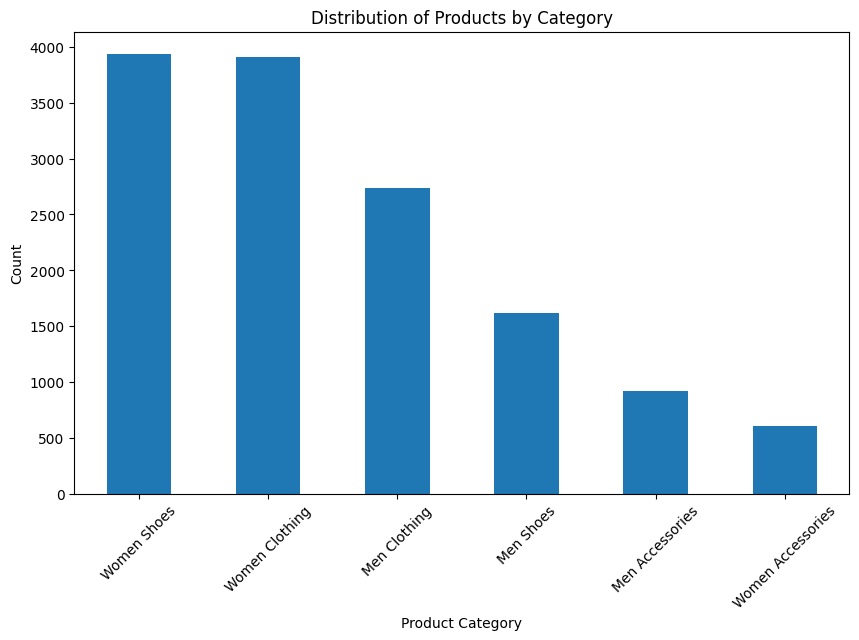

In [23]:
# Price Distribution by Product Type

category_counts = vestiaire_clean['product_category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

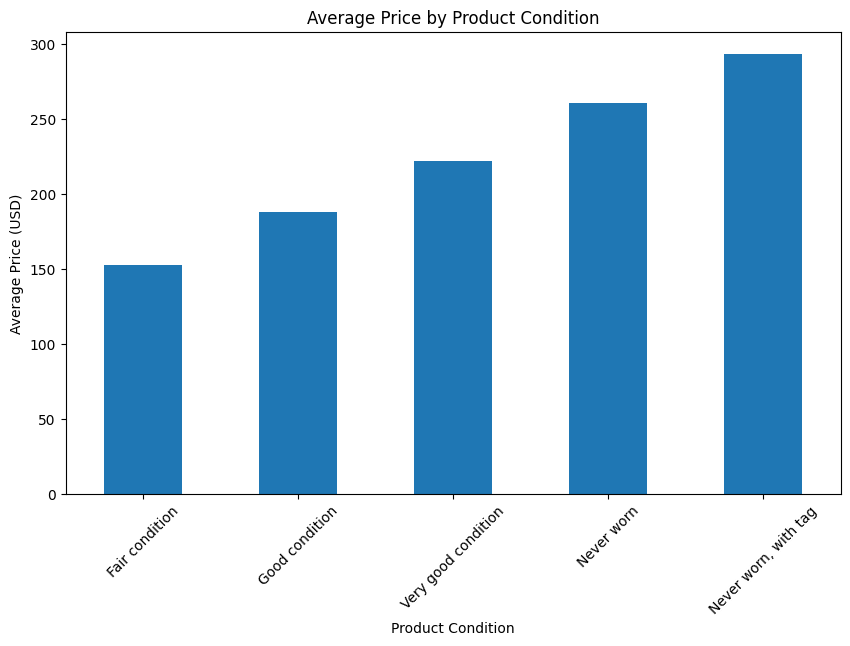

In [24]:
#Average Price by Product Condition

average_price_condition = vestiaire_clean.groupby('product_condition')['price_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_price_condition.plot(kind='bar')
plt.title('Average Price by Product Condition')
plt.xlabel('Product Condition')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

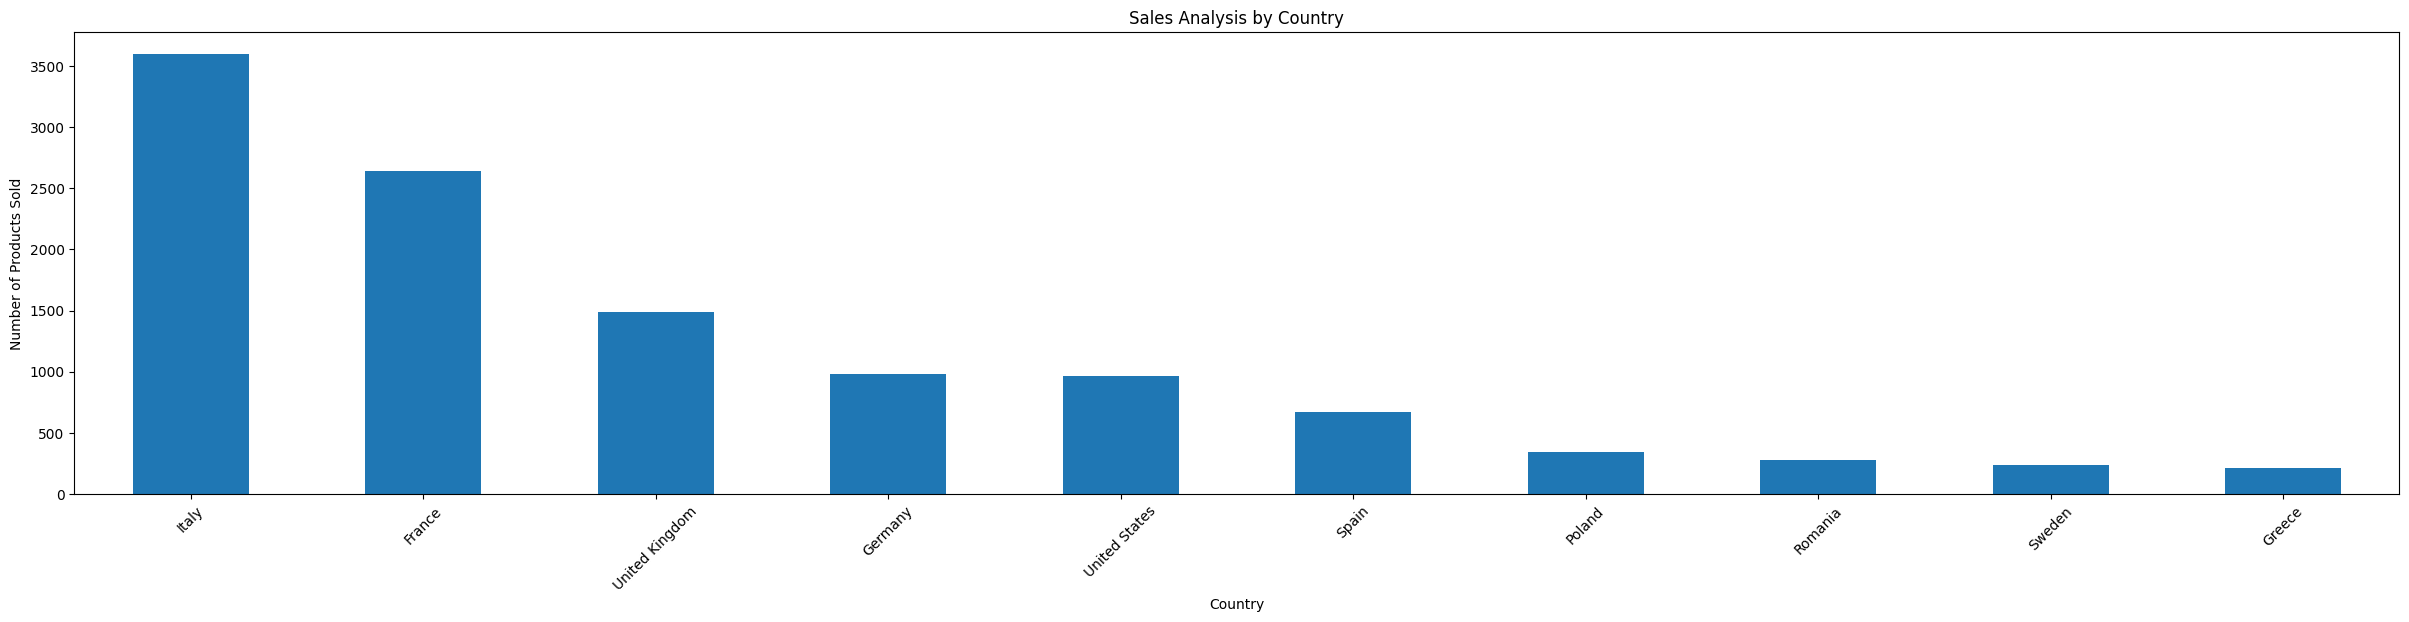

seller_country
Italy             3596
France            2639
United Kingdom    1486
Germany            982
United States      964
Name: count, dtype: int64

In [25]:
# Sales Analysis by Country (Top 10)

country_sales = vestiaire_clean[vestiaire_clean['sold'] == True]['seller_country'].value_counts().head(10)

plt.figure(figsize=(30, 6))
country_sales.plot(kind='bar')
plt.title('Sales Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

country_sales.head()

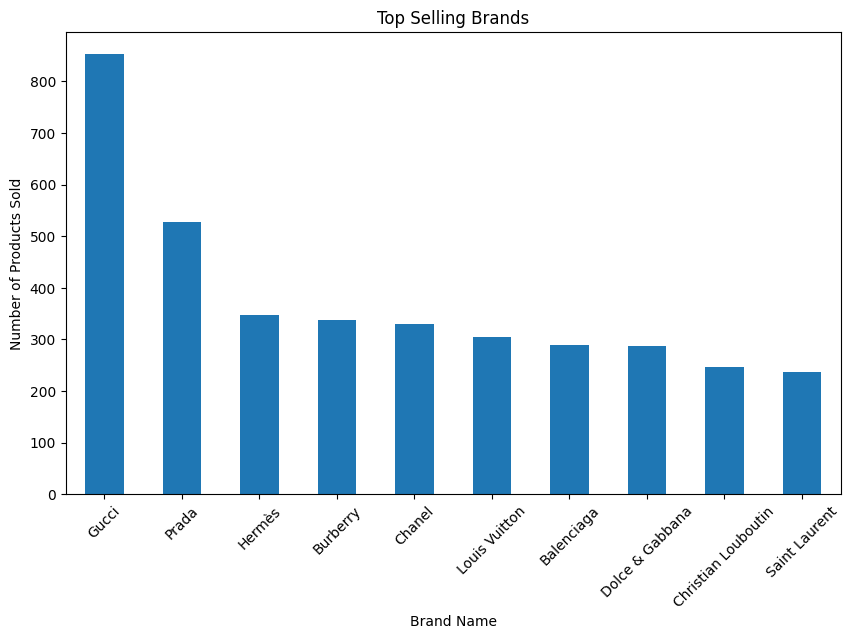

brand_name
Gucci                  853
Prada                  527
Hermès                 348
Burberry               338
Chanel                 329
Louis Vuitton          304
Balenciaga             289
Dolce & Gabbana        288
Christian Louboutin    247
Saint Laurent          236
Name: count, dtype: int64

In [26]:
#Top selling brands 
top_selling_brands = vestiaire_clean[vestiaire_clean['sold'] == True]['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_selling_brands.plot(kind='bar')
plt.title('Top Selling Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

top_selling_brands

<Figure size 1400x800 with 0 Axes>

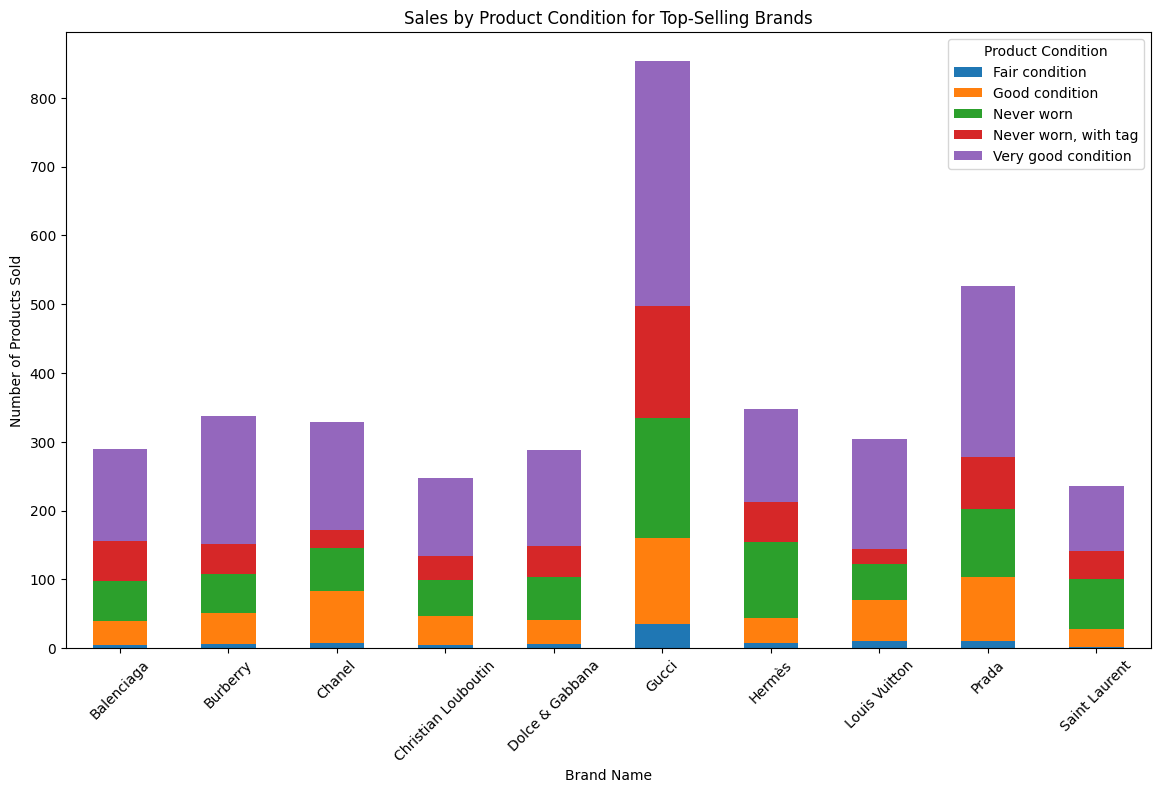

product_condition,Fair condition,Good condition,Never worn,"Never worn, with tag",Very good condition
brand_name,,,,,
Balenciaga,5,35,57,58,134
Burberry,6,45,57,44,186
Chanel,8,75,63,25,158
Christian Louboutin,5,41,53,35,113
Dolce & Gabbana,6,35,62,46,139
Gucci,35,125,174,164,355
Hermès,7,37,110,59,135
Louis Vuitton,11,59,53,21,160
Prada,10,93,99,76,249


In [27]:
#The relationship between product condition and sales for these brands

# Calculate top-selling brands based on the number of products sold
top_selling_brands = vestiaire_clean[vestiaire_clean['sold'] == True]['brand_name'].value_counts().head(10)

# Filter the dataframe to include only the top-selling brands
top_brands_list = top_selling_brands.index
top_brands_df = vestiaire_clean[vestiaire_clean['brand_name'].isin(top_brands_list)]

# Group by brand name and product condition, then count the number of sold products
condition_sales = top_brands_df[top_brands_df['sold'] == True].groupby(['brand_name', 'product_condition']).size().unstack(fill_value=0)

# Plot the relationship between product condition and sales for top-selling brands
plt.figure(figsize=(14, 8))
condition_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sales by Product Condition for Top-Selling Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Condition')
plt.show()

condition_sales

# Rebecca's Code

In [28]:
# Seller by Country

# List all unique seller countries
seller_countries = vestiaire_clean['seller_country'].unique()

# Display the list of seller countries
print("List of Seller Countries:")
print(seller_countries)

List of Seller Countries:
['Germany' 'Italy' 'Spain' 'United Kingdom' 'Netherlands' 'France'
 'Austria' 'Ireland' 'Croatia' 'Sweden' 'United States' 'Denmark' 'Monaco'
 'Bulgaria' 'Belgium' 'Cyprus' 'Finland' 'Poland' 'Australia' 'Romania'
 'Hungary' 'Lithuania' 'Greece' 'Hong Kong' 'Singapore' 'Latvia'
 'Luxembourg' 'Canada' 'United Arab Emirates' 'Portugal' 'Estonia'
 'Switzerland' 'Slovenia' 'Slovakia' 'Philippines' 'Kazakhstan'
 'Czech Republic' 'South Korea' 'Malaysia' 'China' 'Japan' 'Malta'
 'Lebanon' 'Qatar' 'Israel' 'Indonesia' 'Bahrain' 'Norway' 'Turkey'
 'Saudi Arabia' 'New Zealand']


In [29]:
## Find the country with top sold items

# Group by country and sum the items sold
country_sales = vestiaire_clean.groupby('seller_country')['sold'].sum().sort_values(ascending=False)

print(f'Top Country with most items sold : {country_sales.index[0]}')

Top Country with most items sold : Italy


In [30]:
# Find top products sold in Italy
Italy_products = vestiaire_clean.loc[vestiaire_clean['seller_country']=='Italy']

Italy_top_products_sold = Italy_products.groupby('product_category').size().reset_index(name='count').sort_values(by='count', ascending=False)

Italy_top_products_sold

# Woman Clothing is the Top products sold by Italy

,product_category,count
4,Women Clothing,923
5,Women Shoes,867
1,Men Clothing,840
2,Men Shoes,482
0,Men Accessories,321
3,Women Accessories,163


In [31]:
Italy_products = vestiaire_clean.loc[(vestiaire_clean['seller_country'] == 'Italy') & (vestiaire_clean['sold'] == True)]

# Calculate the total earnings
total_earnings_Italy = Italy_products['seller_earning'].sum()

# Display the total earnings
print(f"Total earnings by Italy from sold products: ${total_earnings_Italy:.2f}")

Total earnings by Italy from sold products: $529570.04


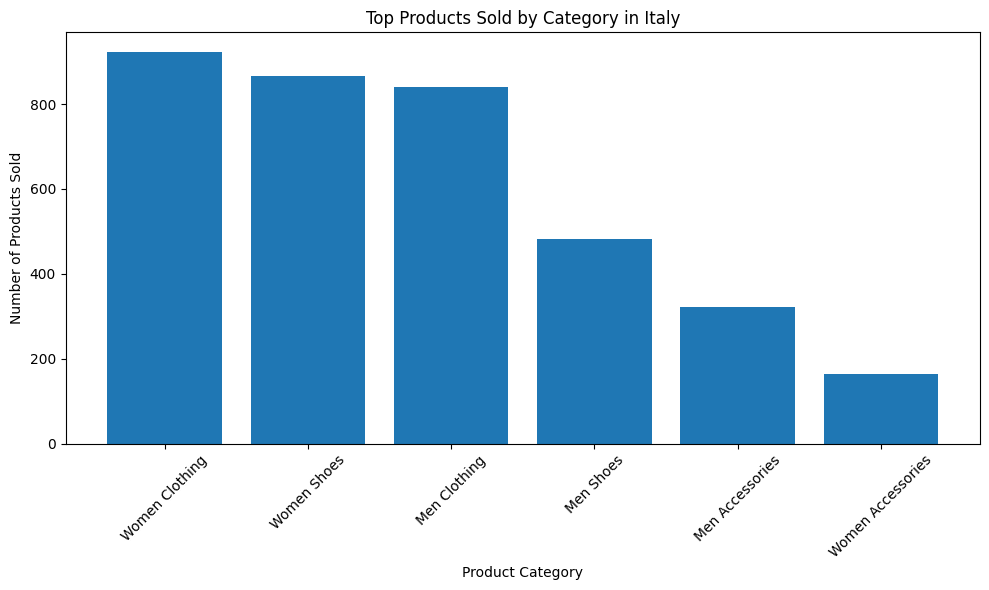

In [32]:
# Plot the results using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(Italy_top_products_sold['product_category'], Italy_top_products_sold['count'])
plt.xticks(rotation=45)  
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Top Products Sold by Category in Italy')
plt.tight_layout()  
plt.show()

In [33]:
# Find top products sold in USA
US_products = vestiaire_clean.loc[vestiaire_clean['seller_country']=='United States']

US_top_products_sold = US_products.groupby('product_category').size().reset_index(name='count').sort_values(by='count', ascending=False)

US_top_products_sold

,product_category,count
5,Women Shoes,380
4,Women Clothing,209
2,Men Shoes,123
1,Men Clothing,101
0,Men Accessories,76
3,Women Accessories,75


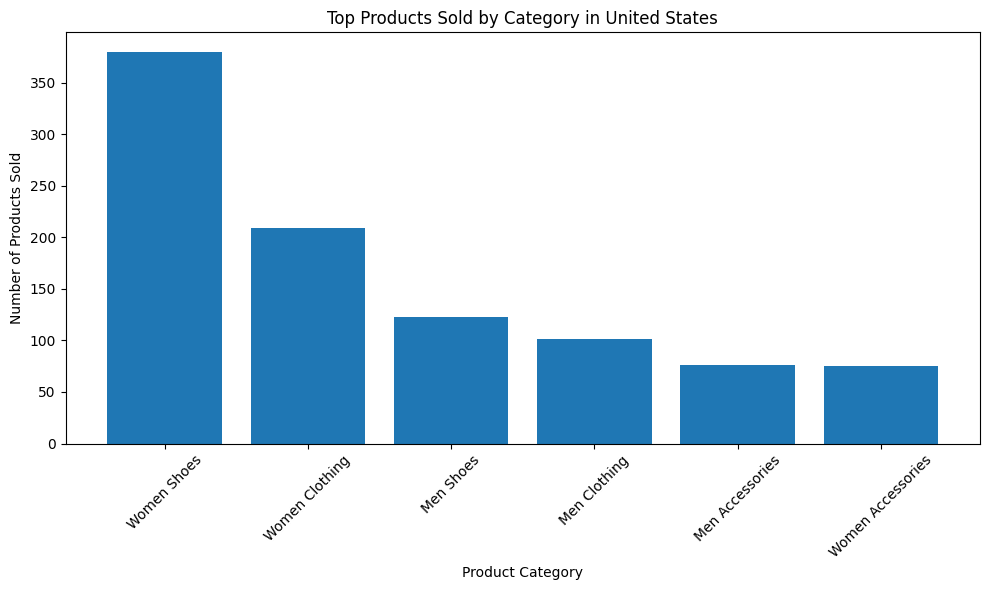

In [34]:
# Plot the results using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(US_top_products_sold['product_category'], US_top_products_sold['count'])
plt.xticks(rotation=45) 
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Top Products Sold by Category in United States')
plt.tight_layout()  
plt.show()

In [35]:
# Find total earnings by country for sold items
sold_products = vestiaire_clean[vestiaire_clean['sold'] == True]

# Group by seller country and sum the seller earnings
earnings_by_country = sold_products.groupby('seller_country')['seller_earning'].sum().reset_index()

# Rename the columns for better readability
earnings_by_country.columns = ['Country', 'Total Earnings']

# Sort the results by total earnings in descending order
earnings_by_country = earnings_by_country.sort_values(by='Total Earnings', ascending=False)

# Display the resulting DataFrame
print(earnings_by_country)

                 Country  Total Earnings
21                 Italy       529570.04
13                France       475172.45
50         United States       268092.09
49        United Kingdom       267754.03
14               Germany       182156.73
44                 Spain       103395.97
35                Poland        51003.14
16             Hong Kong        43973.27
38               Romania        43404.85
3                Belgium        36987.27
31           Netherlands        34244.99
15                Greece        32935.99
1                Austria        31773.01
45                Sweden        29929.06
4               Bulgaria        28767.13
36              Portugal        25218.11
0              Australia        25091.17
10               Denmark        20847.09
19               Ireland        15775.27
26             Lithuania        14870.55
12               Finland        12185.14
46           Switzerland        11523.04
9         Czech Republic        11062.98
7               

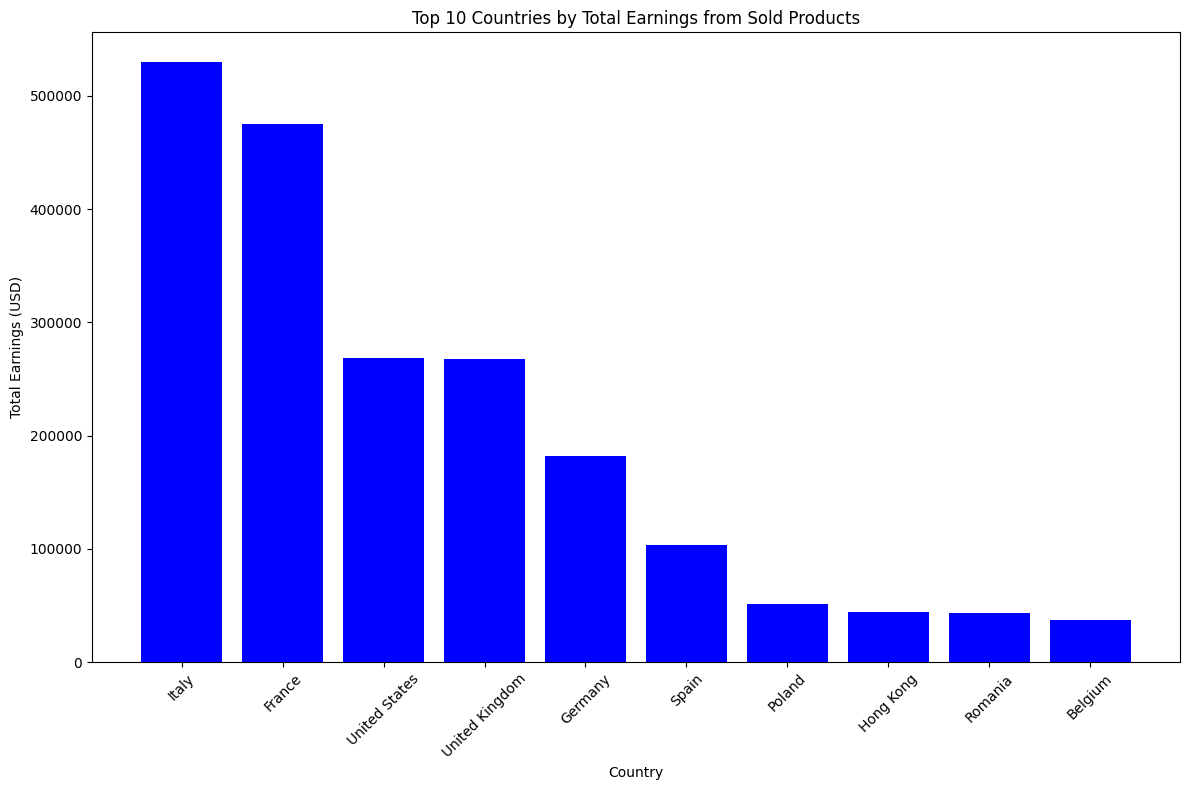

In [36]:
# Select the top 10 countries
top_10_countries = earnings_by_country.head(10)

# Plot the top 10 countries by earnings
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['Country'], top_10_countries['Total Earnings'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Earnings (USD)')
plt.title('Top 10 Countries by Total Earnings from Sold Products')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [37]:
# Group by product_name and find the maximum price_usd for each product
most_expensive_products = vestiaire_clean.groupby('product_name')['price_usd'].max().reset_index()

# Sort the products by price in descending order to find the most expensive ones
most_expensive_products_sorted = most_expensive_products.sort_values(by='price_usd', ascending=False)

# Display the most expensive products
top_10_most_expensive_products = most_expensive_products_sorted.head(10)

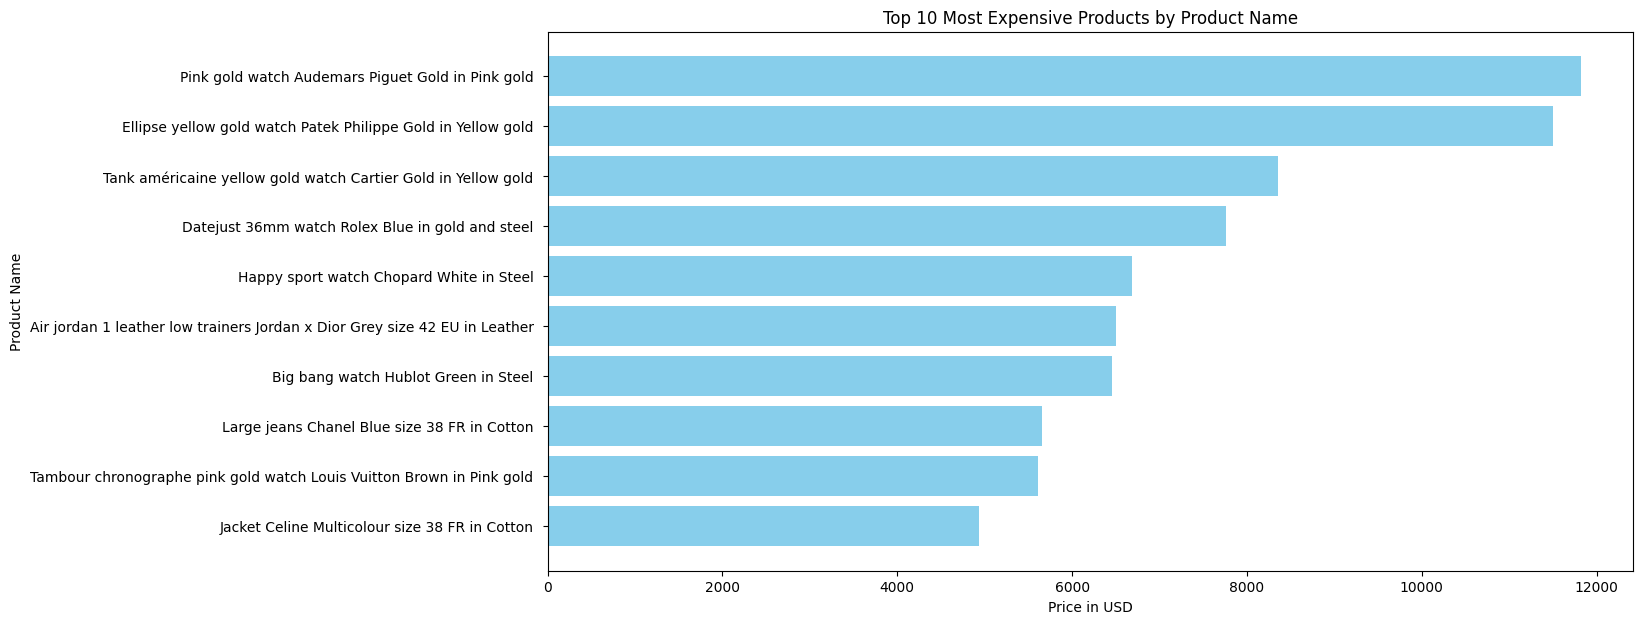

In [38]:
# Plot the result
plt.figure(figsize=(14, 7))
plt.barh(top_10_most_expensive_products['product_name'], top_10_most_expensive_products['price_usd'], color='skyblue')
plt.xlabel('Price in USD')
plt.ylabel('Product Name')
plt.title('Top 10 Most Expensive Products by Product Name')
plt.gca().invert_yaxis()
plt.show()

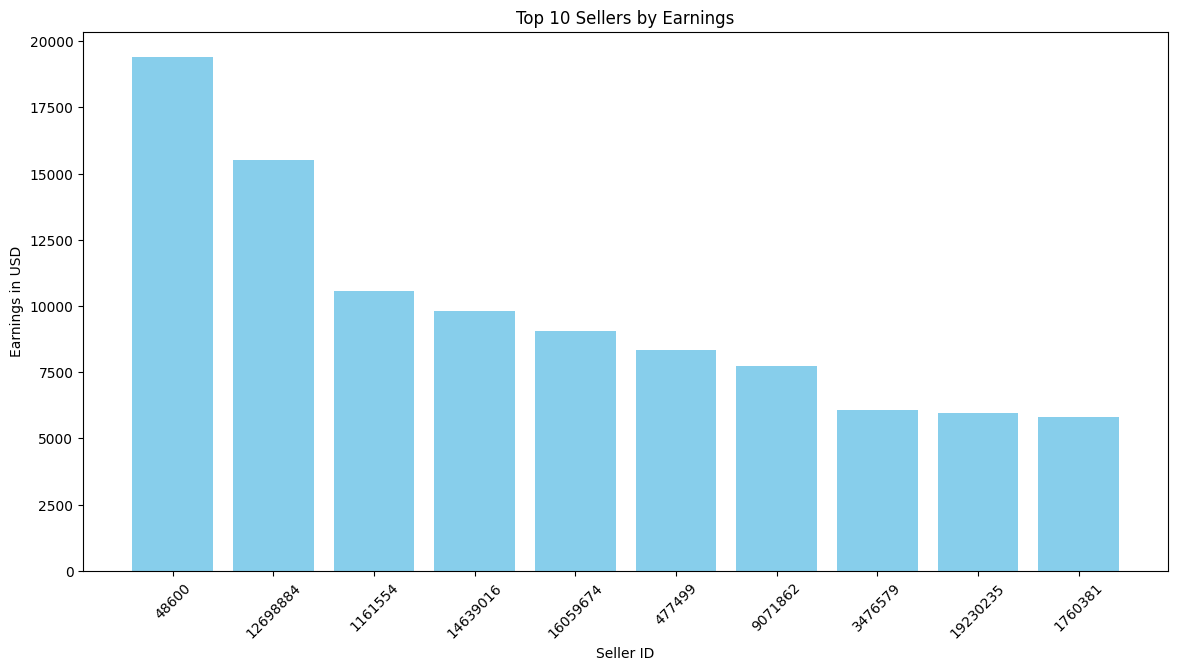

In [39]:
# Group by seller_id and sum the seller_earning for each seller
top_sellers_earnings = vestiaire_clean.groupby('seller_id')['seller_earning'].sum().reset_index()

# Sort the sellers by earnings in descending order to find the top 10 sellers
top_10_sellers_earnings = top_sellers_earnings.sort_values(by='seller_earning', ascending=False).head(10)

# Plot the result
plt.figure(figsize=(14, 7))
plt.bar(top_10_sellers_earnings['seller_id'].astype(str), top_10_sellers_earnings['seller_earning'], color='skyblue')
plt.xlabel('Seller ID')
plt.ylabel('Earnings in USD')
plt.title('Top 10 Sellers by Earnings')
plt.xticks(rotation=45)
plt.show()

# Russell's Code

### Russell's Visualizations and Transformations
### Seasonal sales of products by material

In [40]:
#Gathering and Formatting the Data
clothing_df = vestiaire_clean[vestiaire_clean['product_category'].isin(['Women Clothing', 'Men Clothing'])]

#The Cloth material doesnt make much sense as many of the materials are cloth so I am removing it from our count. (That material only occured a few times in the spring/summer season anyway so we wont lose much data.)
clothing_df = clothing_df[clothing_df['product_material'] != 'Cloth']

#Counting the quantity of clothing sold for each material
seasonal_materials_df = clothing_df.groupby(['product_season', 'product_material']).size().reset_index(name='count')

seasonal_materials_df.head()

,product_season,product_material,count
0,All seasons,Alligator,1
1,All seasons,Cashmere,1
2,All seasons,Cotton,2640
3,All seasons,Cotton - elasthane,136
4,All seasons,Crocodile,1


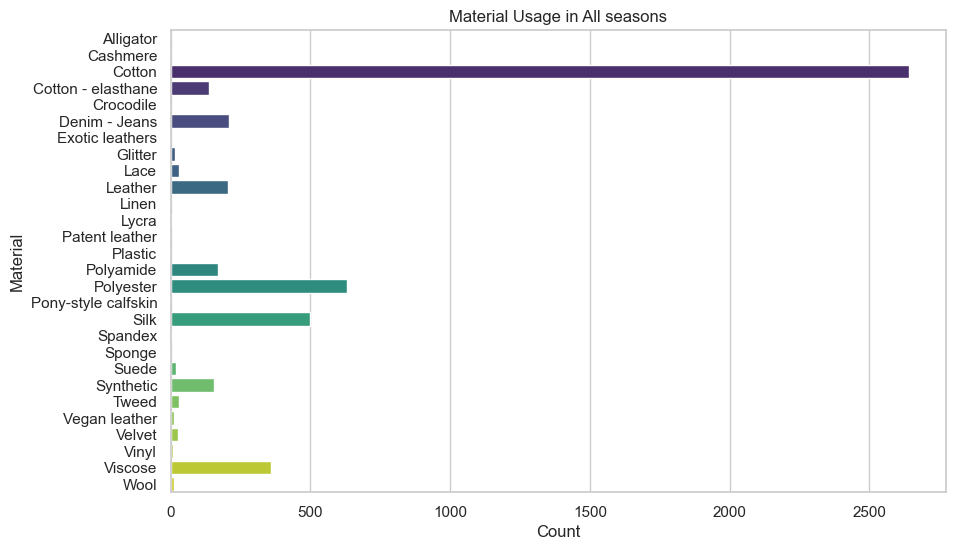

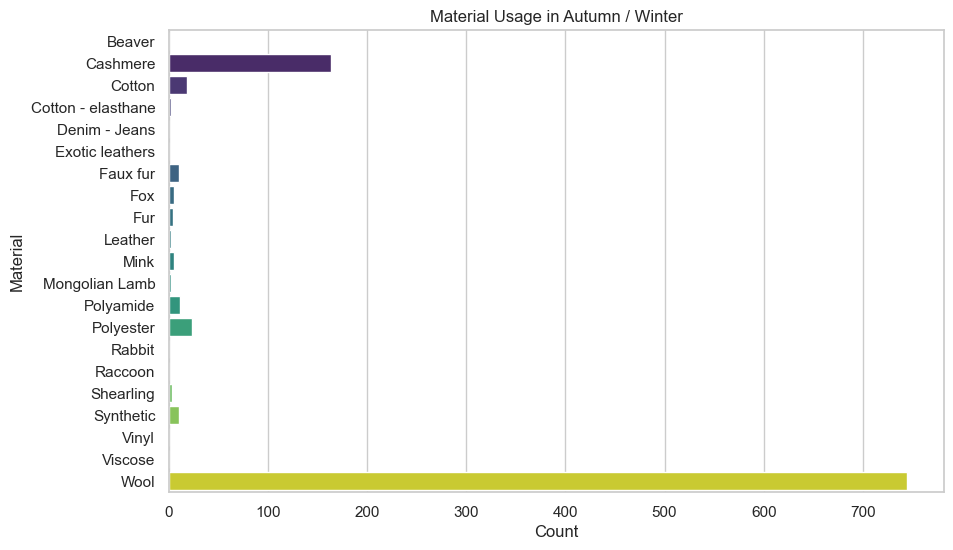

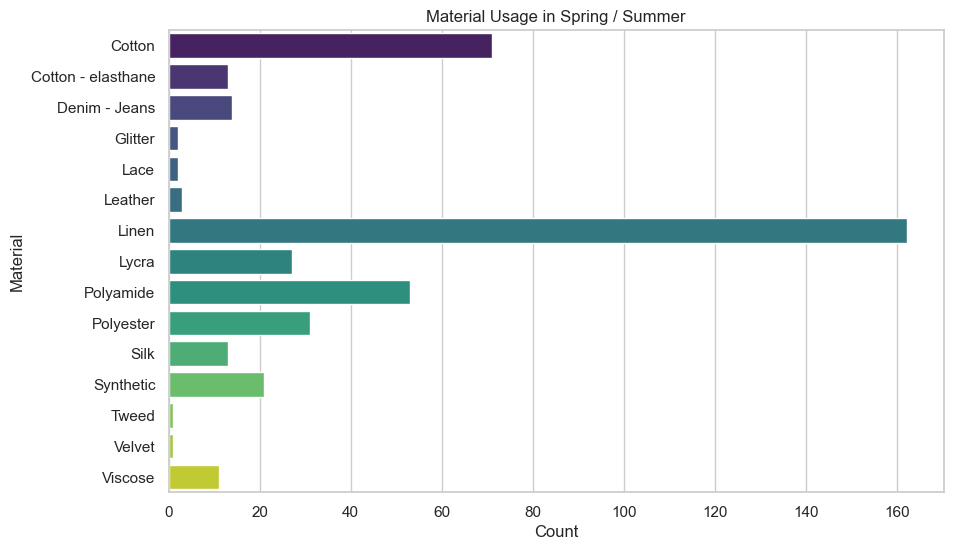

In [41]:
# Set the style for the plots
sns.set(style="whitegrid")

# List of seasons
seasons = ['All seasons', 'Autumn / Winter', 'Spring / Summer']

# Create a bar plot for each season
for season in seasons:
    plt.figure(figsize=(10, 6))
    season_data = seasonal_materials_df[seasonal_materials_df['product_season'] == season]
    sns.barplot(x='count', y='product_material', data=season_data, palette='viridis')
    plt.title(f'Material Usage in {season}')
    plt.xlabel('Count')
    plt.ylabel('Material')
    plt.show()

# Analysis
### We can see that it is best to sell Wool in the Autumn/Winter, Linen in the Spring/Summer, and of course Cotton is popular in any season.

# Price/Margin Visualization

In [42]:
# Ensure the DataFrame contains the necessary columns
if 'price_usd' in vestiaire_clean.columns and 'seller_earning' in vestiaire_clean.columns:
    # Calculate the percentage of earnings_ratio_percentage
    vestiaire_clean['earnings_ratio_percentage'] = (vestiaire_clean['seller_earning'] / vestiaire_clean['price_usd']) * 100
    # Handle potential division by zero errors by replacing infinities with NaN
    vestiaire_clean['earnings_ratio_percentage'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
else:
    print("The DataFrame does not contain the necessary columns 'price_usd' and 'seller_earning'.")
display(vestiaire_clean.head())
display(vestiaire_clean.tail())

,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,earnings_ratio_percentage
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,25775970,Germany,3,14,79.488495
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,2709130,Italy,172,6,71.294838
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,6048767,Germany,5,15,72.500787
3,43244097,Trousers,Trousers Gucci Beige size M International in C...,Women,Women Clothing,All seasons,Very good condition,4,True,Gucci,Cotton,Beige,145.75,119.44,103.91,10050555,Spain,11,15,71.293310
4,43246432,Lingerie set,Lingerie set Agent Provocateur Black in Polyam...,Women,Women Clothing,All seasons,Very good condition,0,True,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,5594414,United Kingdom,47,13,76.575763


,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_id,seller_country,seller_products_sold,seller_num_products_listed,earnings_ratio_percentage
13731,41542694,Heels,Heels Prada Brown size 37 IT in Suede,Women,Women Shoes,All seasons,Good condition,7,True,Prada,Suede,Brown,29.16,24.30,10.07,22898175,Switzerland,179,44,34.533608
13732,41540056,Simple pump patent leather heels,Simple pump patent leather heels Christian Lou...,Women,Women Shoes,All seasons,Very good condition,3,True,Christian Louboutin,Patent leather,Black,332.28,276.90,276.90,16266013,France,1,0,83.333333
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,3180346,Italy,11,1,72.500558
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,19750106,Italy,62,184,56.259781
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,5992355,Estonia,1,1,83.331617


In [43]:
#Cutting down the data to only neccessary columns
earnings_ratio_percentage_df = vestiaire_clean[['product_name', 'brand_name', 'product_season', 'price_usd', 'seller_earning', 'earnings_ratio_percentage', 'product_color']]
# Sort the DataFrame by 'earnings_ratio_percentage' in descending order
earnings_ratio_percentage_df = earnings_ratio_percentage_df.sort_values(by='earnings_ratio_percentage', ascending=False)
# Reset the index of the sorted DataFrame
earnings_ratio_percentage_df = earnings_ratio_percentage_df.reset_index(drop=True)
earnings_ratio_percentage_df = earnings_ratio_percentage_df[(earnings_ratio_percentage_df['earnings_ratio_percentage'] != 100) & (earnings_ratio_percentage_df['earnings_ratio_percentage'] != 0)]
# Display the head and tail of the sorted DataFrame
display(earnings_ratio_percentage_df.head())
display(earnings_ratio_percentage_df.tail())

,product_name,brand_name,product_season,price_usd,seller_earning,earnings_ratio_percentage,product_color
8,Leather purse Louis Vuitton Brown in Leather,Louis Vuitton,All seasons,200.00,194.00,97.000000,Brown
9,Leather mules & clogs Gucci Black size 37 EU i...,Gucci,All seasons,129.00,125.13,97.000000,Black
10,Leather biker jacket Burberry Green size 8 UK ...,Burberry,All seasons,171.00,165.87,97.000000,Green
11,Sunglasses Dita Black in Plastic,Dita,All seasons,354.00,343.38,97.000000,Black
12,101801 wool coat Max Mara Camel size 0 US in W...,Max Mara,Autumn / Winter,1227.27,1190.45,96.999845,Camel


,product_name,brand_name,product_season,price_usd,seller_earning,earnings_ratio_percentage,product_color
13713,Top Saint James Multicolour size XS Internatio...,Saint James,All seasons,22.39,2.22,9.915141,Multicolour
13714,T,Katie Eary,All seasons,25.44,2.49,9.787736,Multicolour
13715,Leather high trainers Pierre Hardy Black size ...,Pierre Hardy,All seasons,50.00,4.39,8.780000,Black
13716,Sunglasses Dolce & Gabbana Grey in Plastic,Dolce & Gabbana,All seasons,67.81,5.94,8.759770,Grey
13717,Scarf Burberry Multicolour in Cotton,Burberry,Autumn / Winter,62.70,1.74,2.775120,Multicolour


In [44]:
# Display top earnings percentages
top_earnings_ratio_percentage = earnings_ratio_percentage_df.head(10)
bottom_earnings_ratio_percentage = earnings_ratio_percentage_df.tail(10)
# Set sizes for bubbles for clearer visualization
desired_max_size = 20
sizeref = 2. * max(top_earnings_ratio_percentage['earnings_ratio_percentage'].max(), bottom_earnings_ratio_percentage['earnings_ratio_percentage'].max()) / (desired_max_size ** 2)
# Determine the axis ranges
x_min = min(top_earnings_ratio_percentage['price_usd'].min(), bottom_earnings_ratio_percentage['price_usd'].min())
x_max = max(top_earnings_ratio_percentage['price_usd'].max(), bottom_earnings_ratio_percentage['price_usd'].max())
y_min = min(top_earnings_ratio_percentage['earnings_ratio_percentage'].min(), bottom_earnings_ratio_percentage['earnings_ratio_percentage'].min())
y_max = max(top_earnings_ratio_percentage['earnings_ratio_percentage'].max(), bottom_earnings_ratio_percentage['earnings_ratio_percentage'].max())
# Calculate buffer
x_buffer = (x_max - x_min) * .1
y_buffer = (y_max - y_min) * .1
# Adjust ranges with buffer
x_min -= x_buffer
x_max += x_buffer
y_min -= y_buffer
y_max += y_buffer
# Create the first bubble plot
fig1 = go.Figure(data=go.Scatter(
    x=top_earnings_ratio_percentage['price_usd'],
    y=top_earnings_ratio_percentage['earnings_ratio_percentage'],
    mode='markers',
    name='Top Earnings Ratio Percentage Items',
    marker=dict(
        size=top_earnings_ratio_percentage['earnings_ratio_percentage'],
        sizemode='area',
        sizeref=sizeref),
    text=top_earnings_ratio_percentage['product_name'],
    hovertemplate=
        'Price: %{x}<br>' +
        'earnings_ratio_percentage: %{y}<br>' +
        'Product: %{text}<br>'
))
# Create the second bubble plot
fig2 = go.Figure(data=go.Scatter(
    x=bottom_earnings_ratio_percentage['price_usd'],
    y=bottom_earnings_ratio_percentage['earnings_ratio_percentage'],
    mode='markers',
    name='Worst Earnings Ratio Percentage Items',
    marker=dict(
        size=bottom_earnings_ratio_percentage['earnings_ratio_percentage'],
        sizemode='area',
        sizeref=sizeref),
    text=top_earnings_ratio_percentage['product_name'],
    hovertemplate=
        'Price: %{x}<br>' +
        'earnings_ratio_percentage: %{y}<br>' +
        'Product: %{text}<br>'
))
# Combine into a single figure for compatibility with dropdown
earnings_fig = go.Figure(data=fig1.data + fig2.data)
# Add dropdown
earnings_fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    label="Top earnings_ratio_percentage Items",
                    method="update",
                    args=[{"visible": [True] * len(fig1.data) + [False] * len(fig2.data)},
                          {"title": "Top earnings_ratio_percentage Items",
                           "xaxis": {"range": [x_min, x_max]},
                           "yaxis": {"range": [y_min, y_max]}}]
                ),
                dict(
                    label="Worst earnings_ratio_percentage Items",
                    method="update",
                    args=[{"visible": [False] * len(fig1.data) + [True] * len(fig2.data)},
                          {"title": "Worst earnings_ratio_percentage Items",
                           "xaxis": {"range": [x_min, x_max]},
                           "yaxis": {"range": [y_min, y_max]}}]
                ),
                dict(
                    label="Combined earnings_ratio_percentage Items",
                    method="update",
                    args=[{"visible": [True] * len(fig1.data) + [True] * len(fig2.data)},
                          {"title": "Combined earnings_ratio_percentage Items",
                           "xaxis": {"range": [x_min, x_max]},
                           "yaxis": {"range": [y_min, y_max]}}]
                )
            ])
        )
    ],
    xaxis=dict(title='Price in USD', range=[x_min, x_max]),
    yaxis=dict(title='Earnings Ratio Percentage', range=[y_min, y_max]),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='black'
        ),
        bgcolor='LightSteelBlue',
        bordercolor='Black',
        borderwidth=2)
)
# Show the figures
earnings_fig.show()

In [45]:
# Get the HTML string for the Plotly graph
product_earnings_html = earnings_fig.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "product_earnings_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(product_earnings_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as product_earnings_graph.html


# Michael's Code

## Questions
 1. What season category had the most sold products? -Pie Chart
 2. What is the top 5 countries that sold products? -Pie Chart
 3. What is the 20 most sold products by type? - Bar chart
 4. How did prices vary by Country? - Scatter Plot

## Titles
 1. Products Sold category Season -Pie Chart
 2. Top 5 Countries that sold products -Pie Chart
 3. Top 20 products by type - Bar chart
 4. Prices by Country USD - Scatter Plot

In [46]:
# Products sold by seasonal category
product_season_count = vestiaire_clean['product_season'].value_counts()

fig_season = go.Figure(data=[go.Pie(labels=product_season_count.index, values=product_season_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_season.update_layout(title_text= "Seasonal Distribution", title_font_size=24)
fig_season.show()




In [47]:
# Get the HTML string for the Plotly graph
plotly_season_html = fig_season.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_season_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_season_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_season_graph.html


# FINDINGS
### The Findings here show that of the items sold almost 84% of these products fall in the All Season Category.

In [48]:
# Find top selling countries
seller_country_count = vestiaire_clean['seller_country'].value_counts()

top_countries = seller_country_count.head(5)

fig_country = go.Figure(data=[go.Pie(labels=top_countries.index,  values=top_countries.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig_country.update_layout(title_text= "Top 5 countries that Sold Products", title_font_size=24)
fig_country.show()



In [49]:
# Get the HTML string for the Plotly graph
plotly_top_countries_html = fig_country.to_html(full_html=False, include_plotlyjs='cdn')

# Save the Plotly graph as an HTML file
file_path = "plotly_top_country_graph.html"
try:
    with open(file_path, "w") as file:
        file.write(plotly_top_countries_html)
    print(f"Plotly graph saved as {file_path}")
except IOError as e:
    print(f"Error saving Plotly graph: {e}")

Plotly graph saved as plotly_top_country_graph.html


# NOTES
9675 count of 13736 records showing 70% of sold products in data set

# FINDINGS
The findings show the top 5 countries that sold products are Italy at 37.2%, France 27.3%, United Kingdom 15.4%, Germany 10.2% and United States at 9.97%.These top 5 countries make up about 70% of the whole dataset showing that these sellers typically would do better then others outside of these 5.

In [50]:
country_list

['Italy',
 'France',
 'United Kingdom',
 'Germany',
 'United States',
 'Spain',
 'Poland',
 'Romania',
 'Sweden',
 'Greece',
 'Bulgaria',
 'Netherlands',
 'Belgium',
 'Austria',
 'Portugal',
 'Australia',
 'Hong Kong',
 'Ireland',
 'Denmark',
 'Lithuania',
 'Switzerland',
 'Finland',
 'Latvia',
 'Croatia',
 'Czech Republic',
 'Hungary',
 'Monaco',
 'Cyprus',
 'Slovakia',
 'Canada',
 'Luxembourg',
 'Singapore',
 'Estonia',
 'Slovenia',
 'Japan',
 'United Arab Emirates',
 'Malaysia',
 'South Korea',
 'Philippines',
 'Malta',
 'Turkey',
 'China',
 'Qatar',
 'Kazakhstan',
 'Lebanon',
 'Israel',
 'Indonesia',
 'Bahrain',
 'Norway',
 'Saudi Arabia',
 'New Zealand']

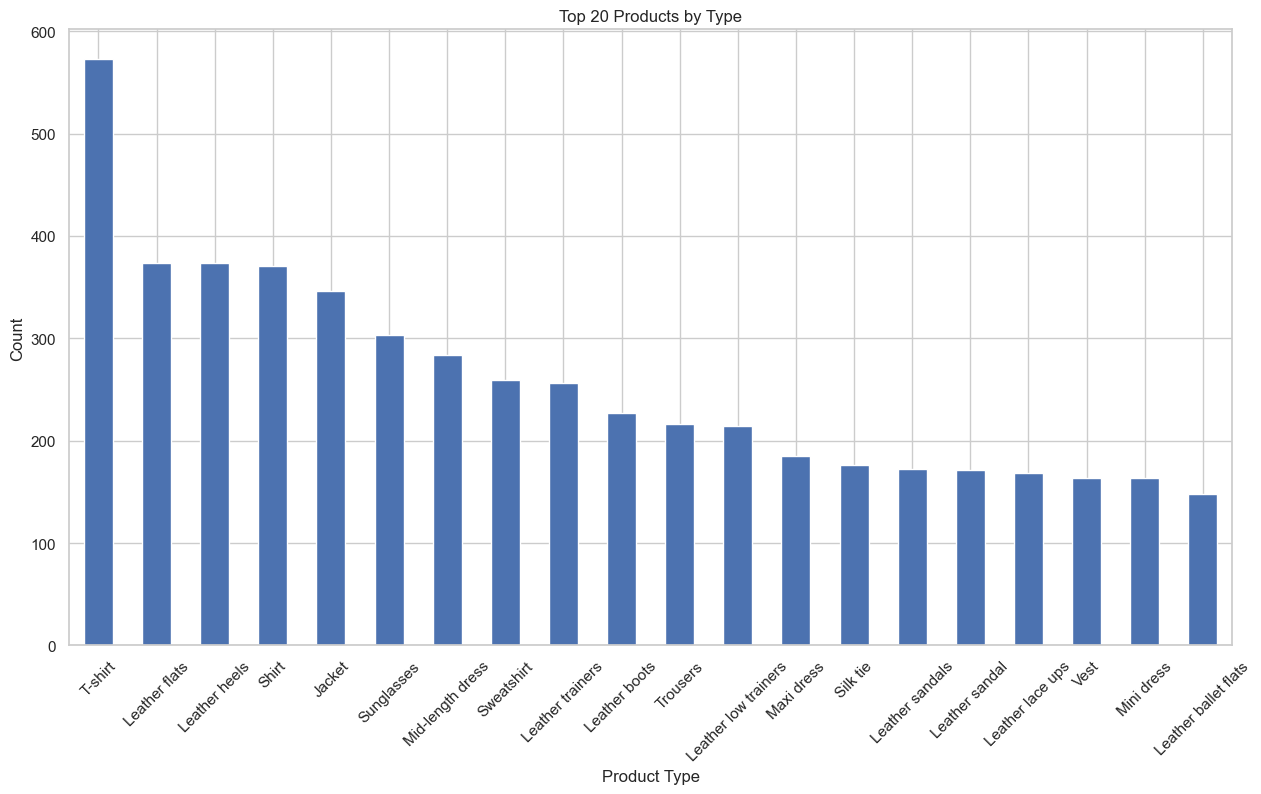

In [51]:
# Price Distribution by Product Type

category_counts = vestiaire_clean['product_type'].value_counts()

top_catergory_counts= category_counts.head(20)

plt.figure(figsize=(15, 8))
top_catergory_counts.plot(kind='bar')
plt.title('Top 20 Products by Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Notes
5150 of 13736 count of products 37.5% of data

# FINDINGS
The findings show that T-shirts are by far the best selling products which is mostly considered a Allseason item and majority where made of cotton based on other charts findings.

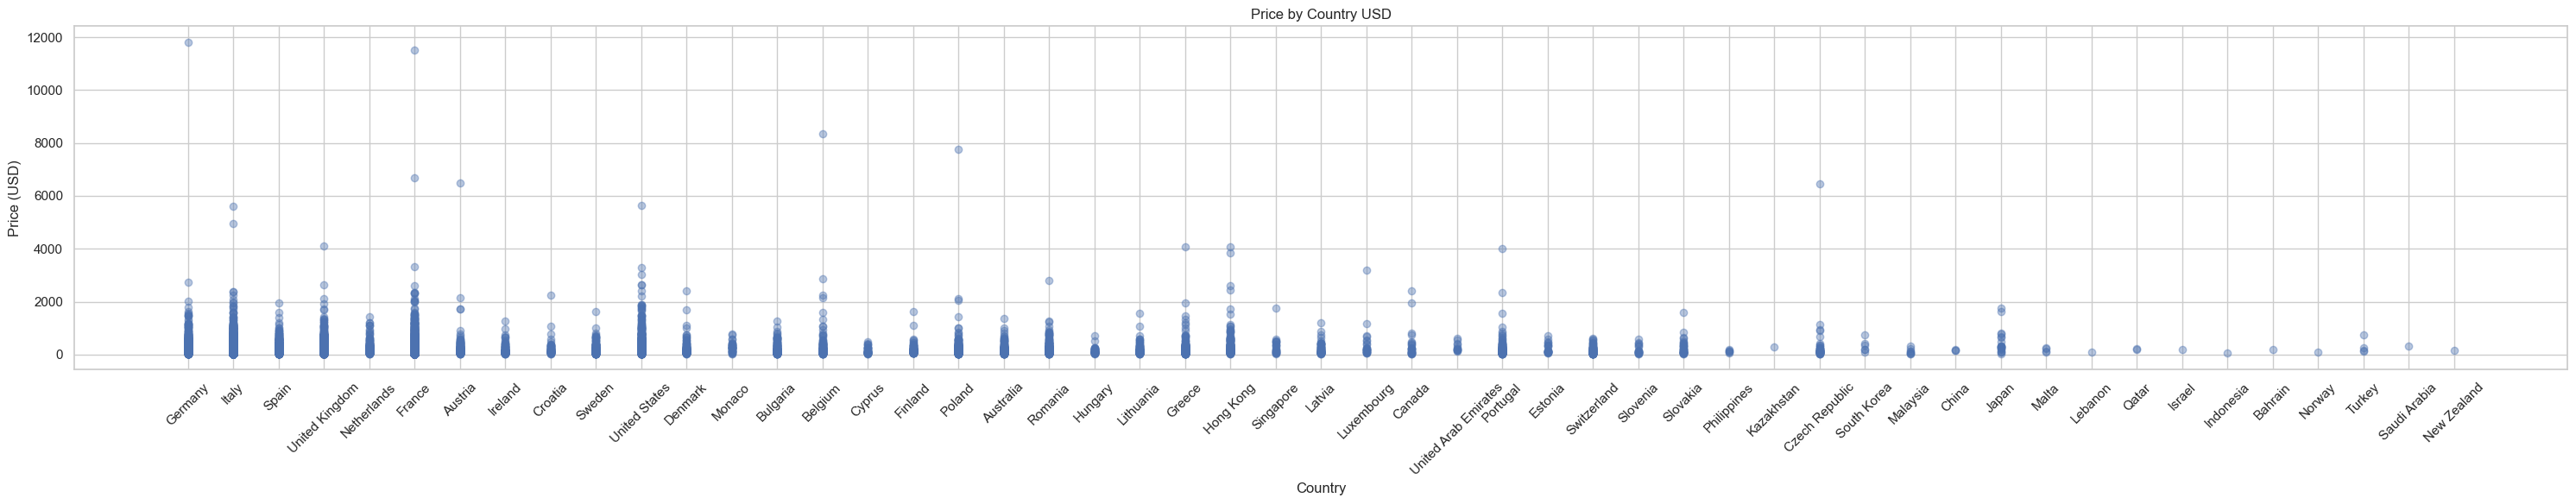

In [52]:
# Create scatter plot of price by Country

# Ensure 'price_usd' column is numeric (convert if necessary)
vestiaire_clean['price_usd'] = pd.to_numeric(vestiaire_clean['price_usd'], errors='coerce')

# Drop rows with missing values (if any)
vestiaire_clean = vestiaire_clean.dropna(subset=['price_usd', 'seller_country'])

plt.figure(figsize=(30, 6))  # Set the figure size (width, height)

# Scatter plot
plt.scatter(vestiaire_clean['seller_country'], vestiaire_clean['price_usd'], alpha=0.4)  # alpha controls transparency

# Customize labels and title
plt.title('Price by Country USD')
plt.xlabel('Country')
plt.ylabel('Price (USD)')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()



# FINDINGS
 The findings show as we saw the top 5 countries that sold product were Italy, France, United Kingdom, Germany and United States from looking at the darker darker blue and more concentrated prices you can see similar results to the top 5 countries pie chart. Now this scatter plot does a better job of showing the variation  then it does correlation due to how much data is seen. This shows where certain countries could have big spikes in sold prices as compared to those with fewer sales.